In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
df= pd.read_excel(r"D:\guvi\test\test 8\House_Rent_Train.xlsx")
df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  int64  
 8   lift             20555 non-null  int64  
 9   swimming_pool    20555 non-null  int64  
 10  negotiable       20555 non-null  int64  
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  int64  
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

In [4]:
df.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [6]:
missing_localities = df[df['locality'].isnull()]
df['locality'].fillna('Unknown', inplace=True)
missing_after_fill = df[df['locality'].isnull()]
print(df.head())

                                 id  type       locality      activation_date  \
0  ff8081815733a243015733b2876600a6  BHK2        Unknown     21-04-2018 14:44   
1  ff8081815ee25e15015ee50004da2acd  BHK2      Bellandur  2017-09-10 12:48:00   
2  ff80818163f29c9e0163f46770b873e7  BHK3  Thiruvanmiyur  2018-12-06 22:02:00   
3  ff80818164b68a700164b74b1b247a1d  BHK1      Attiguppe     20-07-2018 16:22   
4  ff80818163b1faf00163b4b9b8a163b1  BHK3      Kodihalli     31-05-2018 17:41   

    latitude  longitude lease_type  gym  lift  swimming_pool  ...  bathroom  \
0  12.934471  77.634471     FAMILY    1     1              1  ...       2.0   
1  12.929557  77.672280     ANYONE    0     1              0  ...       2.0   
2  12.982870  80.262012     FAMILY    0     1              0  ...       3.0   
3  12.955991  77.531634     FAMILY    0     0              0  ...       1.0   
4  12.963903  77.649446     FAMILY    0     0              0  ...       3.0   

  facing cup_board  floor  total_floor

In [9]:
categorical_columns = ['type', 'locality', 'latitude','longitude','lease_type', 'facing', 'water_supply', 'building_type', 'amenities']

# Drop rows with null values in categorical columns
df.dropna(subset=categorical_columns, inplace=True)

In [10]:
df.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [11]:
df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
5,ff8081815f48e4aa015f4dd1a9c6696b,BHK1,"Seetharampalya,Hoodi",24-10-2017 18:29,12.986196,77.718314,FAMILY,1,1,1,...,2.0,E,1.0,3.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,2.0,18000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,ff80818159ded60e0159dfff948e5bcb,BHK1,Ulsoor,2017-11-10 17:08:00,12.979762,77.615395,ANYONE,0,1,0,...,2.0,E,1.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,20000.0
20528,ff8081815e73c2e2015e74ac10e91975,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,...,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0
20529,ff8081816073f28c016077bb8db47e4f,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,...,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0
20530,ff8081814c6f8c9b014c6febae49016f,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,...,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0


In [14]:
# Assuming df is your DataFrame

# Convert 'activation_date' to datetime format
df['activation_date'] = pd.to_datetime(df['activation_date'])

# Extract date, month, and year
df['year'] = df['activation_date'].dt.year
df['month'] = df['activation_date'].dt.month
df['day'] = df['activation_date'].dt.day

# Extract time in minutes
df['time in mints'] = df['activation_date'].dt.hour * 60 + df['activation_date'].dt.minute

# Display the DataFrame to verify the changes
print(df.head())


                                 id  type              locality  \
1  ff8081815ee25e15015ee50004da2acd  BHK2             Bellandur   
2  ff80818163f29c9e0163f46770b873e7  BHK3         Thiruvanmiyur   
3  ff80818164b68a700164b74b1b247a1d  BHK1             Attiguppe   
4  ff80818163b1faf00163b4b9b8a163b1  BHK3             Kodihalli   
5  ff8081815f48e4aa015f4dd1a9c6696b  BHK1  Seetharampalya,Hoodi   

      activation_date   latitude  longitude lease_type  gym  lift  \
1 2017-09-10 12:48:00  12.929557  77.672280     ANYONE    0     1   
2 2018-12-06 22:02:00  12.982870  80.262012     FAMILY    0     1   
3 2018-07-20 16:22:00  12.955991  77.531634     FAMILY    0     0   
4 2018-05-31 17:41:00  12.963903  77.649446     FAMILY    0     0   
5 2017-10-24 18:29:00  12.986196  77.718314     FAMILY    1     1   

   swimming_pool  ...                                          amenities  \
1              0  ...  {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...   
2              0  ...  {"LIFT"

In [15]:
df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,amenities,water_supply,building_type,balconies,rent,year,month,day,time,time in mints
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0,2017,9,10,768,768
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0,2018,12,6,1322,1322
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,2018-07-20 16:22:00,12.955991,77.531634,FAMILY,0,0,0,...,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0,2018,7,20,982,982
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,2018-05-31 17:41:00,12.963903,77.649446,FAMILY,0,0,0,...,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0,2018,5,31,1061,1061
5,ff8081815f48e4aa015f4dd1a9c6696b,BHK1,"Seetharampalya,Hoodi",2017-10-24 18:29:00,12.986196,77.718314,FAMILY,1,1,1,...,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,2.0,18000.0,2017,10,24,1109,1109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,ff80818159ded60e0159dfff948e5bcb,BHK1,Ulsoor,2017-11-10 17:08:00,12.979762,77.615395,ANYONE,0,1,0,...,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,20000.0,2017,11,10,1028,1028
20528,ff8081815e73c2e2015e74ac10e91975,BHK2,Koramangala 4th Block,2017-10-19 20:31:00,12.931072,77.632361,ANYONE,0,0,0,...,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0,2017,10,19,1231,1231
20529,ff8081816073f28c016077bb8db47e4f,BHK2,Kumaraswamy Layout,2017-12-21 21:18:00,12.901800,77.566597,FAMILY,1,1,0,...,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0,2017,12,21,1278,1278
20530,ff8081814c6f8c9b014c6febae49016f,BHK2,Indiranagar,2018-06-28 21:58:00,12.965502,77.647694,FAMILY,0,1,0,...,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0,2018,6,28,1318,1318


In [ ]:
df.drop(['activation_date', 'time'], axis=1, inplace=True)


In [20]:
df.drop(['id'], axis=1, inplace=True)


In [21]:
df

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,total_floor,amenities,water_supply,building_type,balconies,rent,year,month,day,time in mints
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,...,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0,2017,9,10,768
2,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,...,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0,2018,12,6,1322
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,...,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0,2018,7,20,982
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,...,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0,2018,5,31,1061
5,BHK1,"Seetharampalya,Hoodi",12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,...,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,2.0,18000.0,2017,10,24,1109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,BHK1,Ulsoor,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,...,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,20000.0,2017,11,10,1028
20528,BHK2,Koramangala 4th Block,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,...,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0,2017,10,19,1231
20529,BHK2,Kumaraswamy Layout,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,...,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0,2017,12,21,1278
20530,BHK2,Indiranagar,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,...,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0,2018,6,28,1318


In [23]:
df['amenities'].head(5)

1    {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...
2    {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...
3    {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
4    {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
5    {"LIFT":true,"GYM":true,"INTERNET":false,"AC":...
Name: amenities, dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20377 entries, 1 to 20531
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           20377 non-null  object 
 1   locality       20377 non-null  object 
 2   latitude       20377 non-null  float64
 3   longitude      20377 non-null  float64
 4   lease_type     20377 non-null  object 
 5   gym            20377 non-null  int64  
 6   lift           20377 non-null  int64  
 7   swimming_pool  20377 non-null  int64  
 8   negotiable     20377 non-null  int64  
 9   furnishing     20377 non-null  object 
 10  parking        20377 non-null  object 
 11  property_size  20377 non-null  int64  
 12  property_age   20377 non-null  float64
 13  bathroom       20377 non-null  float64
 14  facing         20377 non-null  object 
 15  cup_board      20377 non-null  float64
 16  floor          20377 non-null  float64
 17  total_floor    20377 non-null  float64
 18  amenit

In [28]:
import json

# Assuming df is your DataFrame

# Convert the string in 'amenities' column to a dictionary
df['amenities'] = df['amenities'].apply(lambda x: json.loads(x.replace("'", "\"")))

# Create a new column 'INTERNET' with the value from the 'INTERNET' key
df['INTERNET'] = df['amenities'].apply(lambda x: x.get('INTERNET', None))

# Display the DataFrame to verify the changes
print(df.head())


   type              locality   latitude  longitude lease_type  gym  lift  \
1  BHK2             Bellandur  12.929557  77.672280     ANYONE    0     1   
2  BHK3         Thiruvanmiyur  12.982870  80.262012     FAMILY    0     1   
3  BHK1             Attiguppe  12.955991  77.531634     FAMILY    0     0   
4  BHK3             Kodihalli  12.963903  77.649446     FAMILY    0     0   
5  BHK1  Seetharampalya,Hoodi  12.986196  77.718314     FAMILY    1     1   

   swimming_pool  negotiable      furnishing  ...  \
1              0           1  SEMI_FURNISHED  ...   
2              0           0  SEMI_FURNISHED  ...   
3              0           1  SEMI_FURNISHED  ...   
4              0           1  SEMI_FURNISHED  ...   
5              1           1  SEMI_FURNISHED  ...   

                                           amenities  water_supply  \
1  {'LIFT': True, 'GYM': False, 'INTERNET': False...   CORPORATION   
2  {'LIFT': True, 'GYM': False, 'INTERNET': False...     CORP_BORE   
3  {'LIF

In [29]:
df

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,amenities,water_supply,building_type,balconies,rent,year,month,day,time in mints,INTERNET
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,...,"{'LIFT': True, 'GYM': False, 'INTERNET': False...",CORPORATION,AP,2.0,22000.0,2017,9,10,768,False
2,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,...,"{'LIFT': True, 'GYM': False, 'INTERNET': False...",CORP_BORE,AP,3.0,28000.0,2018,12,6,1322,False
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,...,"{'LIFT': False, 'GYM': False, 'INTERNET': Fals...",CORPORATION,IH,0.0,8000.0,2018,7,20,982,False
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,...,"{'LIFT': False, 'GYM': False, 'INTERNET': Fals...",CORPORATION,IH,1.0,45000.0,2018,5,31,1061,False
5,BHK1,"Seetharampalya,Hoodi",12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,...,"{'LIFT': True, 'GYM': True, 'INTERNET': False,...",CORP_BORE,AP,2.0,18000.0,2017,10,24,1109,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,BHK1,Ulsoor,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,...,"{'LIFT': True, 'GYM': False, 'INTERNET': True,...",CORP_BORE,AP,1.0,20000.0,2017,11,10,1028,True
20528,BHK2,Koramangala 4th Block,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,...,"{'LIFT': False, 'GYM': False, 'INTERNET': True...",CORPORATION,IH,2.0,30000.0,2017,10,19,1231,True
20529,BHK2,Kumaraswamy Layout,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,...,"{'LIFT': True, 'GYM': True, 'INTERNET': True, ...",BOREWELL,AP,2.0,16000.0,2017,12,21,1278,True
20530,BHK2,Indiranagar,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,...,"{'LIFT': True, 'GYM': False, 'INTERNET': True,...",CORP_BORE,AP,3.0,30000.0,2018,6,28,1318,True


In [30]:
df.drop(['amenities'], axis=1, inplace=True)


In [31]:
df.head(5)

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,total_floor,water_supply,building_type,balconies,rent,year,month,day,time in mints,INTERNET
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,...,4.0,CORPORATION,AP,2.0,22000.0,2017,9,10,768,False
2,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,...,5.0,CORP_BORE,AP,3.0,28000.0,2018,12,6,1322,False
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,...,2.0,CORPORATION,IH,0.0,8000.0,2018,7,20,982,False
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,...,0.0,CORPORATION,IH,1.0,45000.0,2018,5,31,1061,False
5,BHK1,"Seetharampalya,Hoodi",12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,...,5.0,CORP_BORE,AP,2.0,18000.0,2017,10,24,1109,False


In [32]:
pd.set_option('display.max_columns', None)


In [33]:
df

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,year,month,day,time in mints,INTERNET
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0,2017,9,10,768,False
2,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0,2018,12,6,1322,False
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0,2018,7,20,982,False
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,CORPORATION,IH,1.0,45000.0,2018,5,31,1061,False
5,BHK1,"Seetharampalya,Hoodi",12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,3.0,5.0,CORP_BORE,AP,2.0,18000.0,2017,10,24,1109,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,BHK1,Ulsoor,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,30.0,2.0,E,1.0,1.0,4.0,CORP_BORE,AP,1.0,20000.0,2017,11,10,1028,True
20528,BHK2,Koramangala 4th Block,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10.0,2.0,N,2.0,1.0,2.0,CORPORATION,IH,2.0,30000.0,2017,10,19,1231,True
20529,BHK2,Kumaraswamy Layout,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,BOREWELL,AP,2.0,16000.0,2017,12,21,1278,True
20530,BHK2,Indiranagar,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,CORP_BORE,AP,3.0,30000.0,2018,6,28,1318,True


In [34]:
# Assuming df is your DataFrame

# List of columns for which you want to find unique values
columns_to_check = ['lease_type', 'furnishing', 'water_supply', 'INTERNET', 'parking', 'facing', 'building_type']

# Display unique values for each specified column
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")


Unique values for lease_type: ['ANYONE' 'FAMILY' 'BACHELOR' 'COMPANY']
Unique values for furnishing: ['SEMI_FURNISHED' 'FULLY_FURNISHED' 'NOT_FURNISHED']
Unique values for water_supply: ['CORPORATION' 'CORP_BORE' 'BOREWELL']
Unique values for INTERNET: [False  True]
Unique values for parking: ['BOTH' 'TWO_WHEELER' 'NONE' 'FOUR_WHEELER']
Unique values for facing: ['NE' 'E' 'S' 'N' 'SE' 'W' 'NW' 'SW']
Unique values for building_type: ['AP' 'IH' 'IF' 'GC']


In [35]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame

# List of categorical columns to encode
categorical_columns = ['lease_type', 'furnishing', 'water_supply', 'INTERNET', 'parking', 'facing', 'building_type']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the DataFrame with encoded columns
print(df.head())


   type              locality   latitude  longitude  lease_type  gym  lift  \
1  BHK2             Bellandur  12.929557  77.672280           0    0     1   
2  BHK3         Thiruvanmiyur  12.982870  80.262012           3    0     1   
3  BHK1             Attiguppe  12.955991  77.531634           3    0     0   
4  BHK3             Kodihalli  12.963903  77.649446           3    0     0   
5  BHK1  Seetharampalya,Hoodi  12.986196  77.718314           3    1     1   

   swimming_pool  negotiable  furnishing  parking  property_size  \
1              0           1           2        0           1400   
2              0           0           2        0           1350   
3              0           1           2        3            600   
4              0           1           2        0           1500   
5              1           1           2        0           1080   

   property_age  bathroom  facing  cup_board  floor  total_floor  \
1           4.0       2.0       2        2.0    3.0   

In [36]:
df['locality'].unique()

array(['Bellandur', 'Thiruvanmiyur', 'Attiguppe', ...,
       'Reliance Fresh, Whitefield Main Road, Industrial Area, Whitefield',
       'Koramangala 4th block',
       'Mahadevapura bus stop, Mahadevapura, Bengaluru, Karnataka, India'],
      dtype=object)

In [37]:
df['locality'].value_counts()

Whitefield                                                                                        900
HSR Layout                                                                                        682
Banashankari                                                                                      644
Marathahalli                                                                                      473
Bellandur                                                                                         433
                                                                                                 ... 
Simhadri layout                                                                                     1
Skylark Esta, Seetharampalya, Bengaluru, Karnataka, India                                           1
23d, 2nd A Cross Rd, Srinivasnagar, Banashankari, Bengaluru, Karnataka 560050, India,Bengaluru      1
Wilson Garden,                                                                    

In [41]:
import pandas as pd

# Assuming df is your DataFrame

# Identify the top 10 contributing localities
top_localities = df['locality'].value_counts().nlargest(10).index

# Create a new column 'locality_encoded' with 'Others' for non-top localities
df['locality_encoded'] = df['locality'].where(df['locality'].isin(top_localities), 'Others')

# Perform one-hot encoding for 'locality_encoded'
df_encoded = pd.get_dummies(df['locality_encoded'], prefix='locality', drop_first=True)

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'locality' and 'locality_encoded' columns
df.drop(['locality', 'locality_encoded'], axis=1, inplace=True)

# Display the DataFrame with encoded columns
print(df.head())


   type   latitude  longitude  lease_type  gym  lift  swimming_pool  \
1  BHK2  12.929557  77.672280           0    0     1              0   
2  BHK3  12.982870  80.262012           3    0     1              0   
3  BHK1  12.955991  77.531634           3    0     0              0   
4  BHK3  12.963903  77.649446           3    0     0              0   
5  BHK1  12.986196  77.718314           3    1     1              1   

   negotiable  furnishing  parking  property_size  property_age  bathroom  \
1           1           2        0           1400           4.0       2.0   
2           0           2        0           1350           6.0       3.0   
3           1           2        3            600           3.0       1.0   
4           1           2        0           1500          15.0       3.0   
5           1           2        0           1080           0.0       2.0   

   facing  cup_board  floor  total_floor  water_supply  building_type  \
1       2        2.0    3.0          

In [42]:
df

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,year,month,day,time in mints,INTERNET,locality_Banashankari,locality_Bellandur,locality_HSR Layout,locality_JP Nagar,locality_Koramangala,locality_Mahadevapura,locality_Marathahalli,locality_Others,locality_RR Nagar,locality_Whitefield
1,BHK2,12.929557,77.672280,0,0,1,0,1,2,0,1400,4.0,2.0,2,2.0,3.0,4.0,1,0,2.0,22000.0,2017,9,10,768,0,0,1,0,0,0,0,0,0,0,0
2,BHK3,12.982870,80.262012,3,0,1,0,0,2,0,1350,6.0,3.0,0,3.0,1.0,5.0,2,0,3.0,28000.0,2018,12,6,1322,0,0,0,0,0,0,0,0,1,0,0
3,BHK1,12.955991,77.531634,3,0,0,0,1,2,3,600,3.0,1.0,0,1.0,1.0,2.0,1,3,0.0,8000.0,2018,7,20,982,0,0,0,0,0,0,0,0,1,0,0
4,BHK3,12.963903,77.649446,3,0,0,0,1,2,0,1500,15.0,3.0,0,4.0,0.0,0.0,1,3,1.0,45000.0,2018,5,31,1061,0,0,0,0,0,0,0,0,1,0,0
5,BHK1,12.986196,77.718314,3,1,1,1,1,2,0,1080,0.0,2.0,0,1.0,3.0,5.0,2,0,2.0,18000.0,2017,10,24,1109,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,BHK1,12.979762,77.615395,0,0,1,0,1,2,3,850,30.0,2.0,0,1.0,1.0,4.0,2,0,1.0,20000.0,2017,11,10,1028,1,0,0,0,0,0,0,0,1,0,0
20528,BHK2,12.931072,77.632361,0,0,0,0,1,2,0,1000,10.0,2.0,1,2.0,1.0,2.0,1,3,2.0,30000.0,2017,10,19,1231,1,0,0,0,0,0,0,0,1,0,0
20529,BHK2,12.901800,77.566597,3,1,1,0,1,2,0,1000,0.0,2.0,7,2.0,5.0,5.0,0,0,2.0,16000.0,2017,12,21,1278,1,0,0,0,0,0,0,0,1,0,0
20530,BHK2,12.965502,77.647694,3,0,1,0,0,2,0,1000,5.0,2.0,0,2.0,2.0,4.0,2,0,3.0,30000.0,2018,6,28,1318,1,0,0,0,0,0,0,0,1,0,0


In [40]:
df['locality_encoded']

1        Bellandur
2           Others
3           Others
4           Others
5           Others
           ...    
20524       Others
20528       Others
20529       Others
20530       Others
20531       Others
Name: locality_encoded, Length: 20377, dtype: object

In [43]:
df['type'].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS', '1BHK1', 'bhk2',
       'bhk3'], dtype=object)

In [45]:
df['type'] = label_encoder.fit_transform(df['type'])

In [46]:
df

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,year,month,day,time in mints,INTERNET,locality_Banashankari,locality_Bellandur,locality_HSR Layout,locality_JP Nagar,locality_Koramangala,locality_Mahadevapura,locality_Marathahalli,locality_Others,locality_RR Nagar,locality_Whitefield
1,2,12.929557,77.672280,0,0,1,0,1,2,0,1400,4.0,2.0,2,2.0,3.0,4.0,1,0,2.0,22000.0,2017,9,10,768,0,0,1,0,0,0,0,0,0,0,0
2,3,12.982870,80.262012,3,0,1,0,0,2,0,1350,6.0,3.0,0,3.0,1.0,5.0,2,0,3.0,28000.0,2018,12,6,1322,0,0,0,0,0,0,0,0,1,0,0
3,1,12.955991,77.531634,3,0,0,0,1,2,3,600,3.0,1.0,0,1.0,1.0,2.0,1,3,0.0,8000.0,2018,7,20,982,0,0,0,0,0,0,0,0,1,0,0
4,3,12.963903,77.649446,3,0,0,0,1,2,0,1500,15.0,3.0,0,4.0,0.0,0.0,1,3,1.0,45000.0,2018,5,31,1061,0,0,0,0,0,0,0,0,1,0,0
5,1,12.986196,77.718314,3,1,1,1,1,2,0,1080,0.0,2.0,0,1.0,3.0,5.0,2,0,2.0,18000.0,2017,10,24,1109,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,1,12.979762,77.615395,0,0,1,0,1,2,3,850,30.0,2.0,0,1.0,1.0,4.0,2,0,1.0,20000.0,2017,11,10,1028,1,0,0,0,0,0,0,0,1,0,0
20528,2,12.931072,77.632361,0,0,0,0,1,2,0,1000,10.0,2.0,1,2.0,1.0,2.0,1,3,2.0,30000.0,2017,10,19,1231,1,0,0,0,0,0,0,0,1,0,0
20529,2,12.901800,77.566597,3,1,1,0,1,2,0,1000,0.0,2.0,7,2.0,5.0,5.0,0,0,2.0,16000.0,2017,12,21,1278,1,0,0,0,0,0,0,0,1,0,0
20530,2,12.965502,77.647694,3,0,1,0,0,2,0,1000,5.0,2.0,0,2.0,2.0,4.0,2,0,3.0,30000.0,2018,6,28,1318,1,0,0,0,0,0,0,0,1,0,0


In [47]:
df.to_csv('Property.csv', index=False)


In [7]:
df= pd.read_csv(r"C:\Users\Ndeep\Desktop\Property.csv")
df

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,locality_Banashankari,locality_Bellandur,locality_HSR Layout,locality_JP Nagar,locality_Koramangala,locality_Mahadevapura,locality_Marathahalli,locality_Others,locality_RR Nagar,locality_Whitefield
0,2,12.929557,77.672280,0,0,1,0,1,2,0,...,0,1,0,0,0,0,0,0,0,0
1,3,12.982870,80.262012,3,0,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0
2,1,12.955991,77.531634,3,0,0,0,1,2,3,...,0,0,0,0,0,0,0,1,0,0
3,3,12.963903,77.649446,3,0,0,0,1,2,0,...,0,0,0,0,0,0,0,1,0,0
4,1,12.986196,77.718314,3,1,1,1,1,2,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20372,1,12.979762,77.615395,0,0,1,0,1,2,3,...,0,0,0,0,0,0,0,1,0,0
20373,2,12.931072,77.632361,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,1,0,0
20374,2,12.901800,77.566597,3,1,1,0,1,2,0,...,0,0,0,0,0,0,0,1,0,0
20375,2,12.965502,77.647694,3,0,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
pd.set_option('display.max_columns', None)
df

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,year,month,day,time in mints,INTERNET,locality_Banashankari,locality_Bellandur,locality_HSR Layout,locality_JP Nagar,locality_Koramangala,locality_Mahadevapura,locality_Marathahalli,locality_Others,locality_RR Nagar,locality_Whitefield
0,2,12.929557,77.672280,0,0,1,0,1,2,0,1400,4.0,2.0,2,2.0,3.0,4.0,1,0,2.0,22000.0,2017,9,10,768,0,0,1,0,0,0,0,0,0,0,0
1,3,12.982870,80.262012,3,0,1,0,0,2,0,1350,6.0,3.0,0,3.0,1.0,5.0,2,0,3.0,28000.0,2018,12,6,1322,0,0,0,0,0,0,0,0,1,0,0
2,1,12.955991,77.531634,3,0,0,0,1,2,3,600,3.0,1.0,0,1.0,1.0,2.0,1,3,0.0,8000.0,2018,7,20,982,0,0,0,0,0,0,0,0,1,0,0
3,3,12.963903,77.649446,3,0,0,0,1,2,0,1500,15.0,3.0,0,4.0,0.0,0.0,1,3,1.0,45000.0,2018,5,31,1061,0,0,0,0,0,0,0,0,1,0,0
4,1,12.986196,77.718314,3,1,1,1,1,2,0,1080,0.0,2.0,0,1.0,3.0,5.0,2,0,2.0,18000.0,2017,10,24,1109,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20372,1,12.979762,77.615395,0,0,1,0,1,2,3,850,30.0,2.0,0,1.0,1.0,4.0,2,0,1.0,20000.0,2017,11,10,1028,1,0,0,0,0,0,0,0,1,0,0
20373,2,12.931072,77.632361,0,0,0,0,1,2,0,1000,10.0,2.0,1,2.0,1.0,2.0,1,3,2.0,30000.0,2017,10,19,1231,1,0,0,0,0,0,0,0,1,0,0
20374,2,12.901800,77.566597,3,1,1,0,1,2,0,1000,0.0,2.0,7,2.0,5.0,5.0,0,0,2.0,16000.0,2017,12,21,1278,1,0,0,0,0,0,0,0,1,0,0
20375,2,12.965502,77.647694,3,0,1,0,0,2,0,1000,5.0,2.0,0,2.0,2.0,4.0,2,0,3.0,30000.0,2018,6,28,1318,1,0,0,0,0,0,0,0,1,0,0


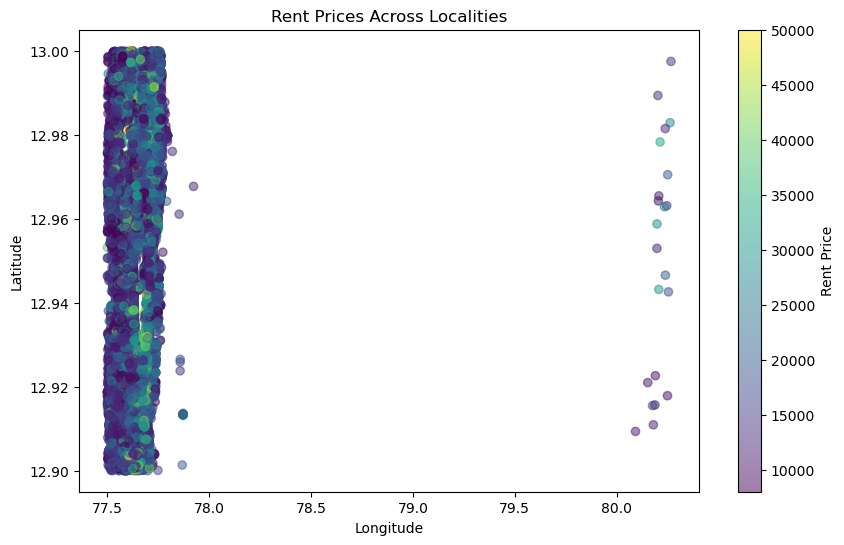

In [8]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['rent'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Rent Price')
plt.title('Rent Prices Across Localities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [49]:
# Assuming df is your DataFrame
rent_latitude_corr = df['rent'].corr(df['latitude'])
rent_longitude_corr = df['rent'].corr(df['longitude'])

print(f'Correlation between Rent and Latitude: {rent_latitude_corr:.2f}')
print(f'Correlation between Rent and Longitude: {rent_longitude_corr:.2f}')


Correlation between Rent and Latitude: 0.03
Correlation between Rent and Longitude: 0.16


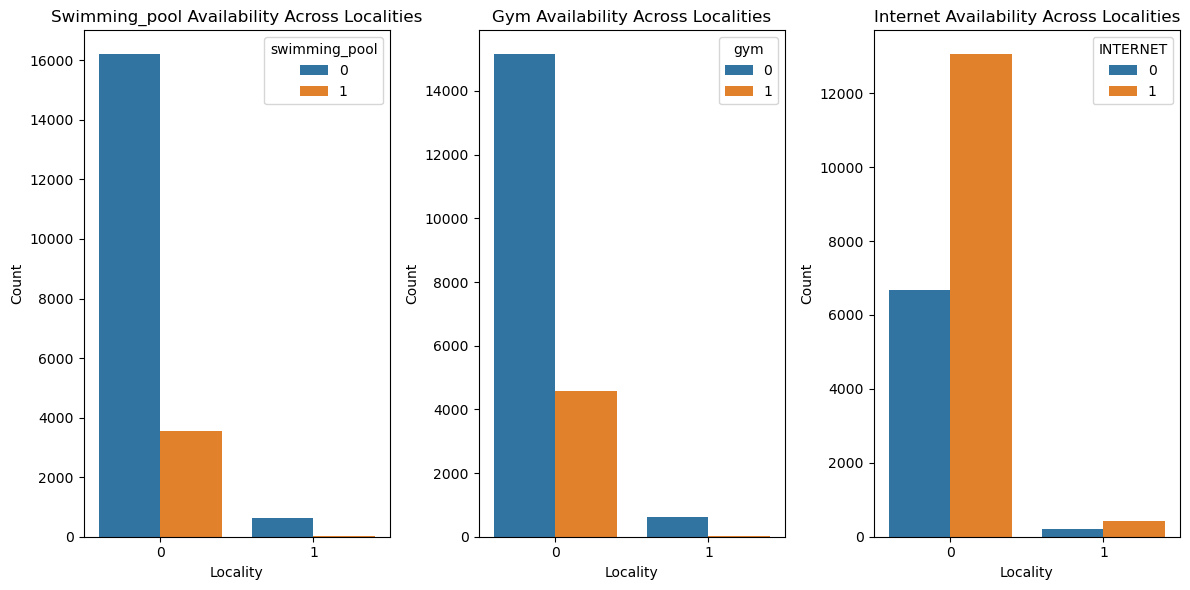

In [9]:
import seaborn as sns

# Assuming df is your DataFrame
amenities = ['swimming_pool', 'gym', 'INTERNET']

plt.figure(figsize=(12, 6))
for amenity in amenities:
    plt.subplot(1, len(amenities), amenities.index(amenity) + 1)
    sns.countplot(x='locality_Banashankari', hue=amenity, data=df)
    plt.title(f'{amenity.capitalize()} Availability Across Localities')
    plt.xlabel('Locality')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


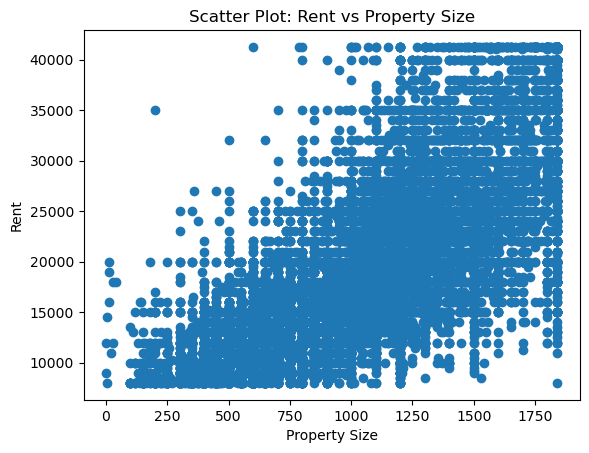

In [66]:
import matplotlib.pyplot as plt

# Example: Scatter plot for 'rent' against 'property_size'
plt.scatter(df['property_size'], df['rent'])
plt.xlabel('Property Size')
plt.ylabel('Rent')
plt.title('Scatter Plot: Rent vs Property Size')
plt.show()


In [15]:
from scipy import stats

# Assuming df is your DataFrame

# Columns to check for outliers
columns_to_check = ['lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing',
                     'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
                     'floor', 'total_floor', 'water_supply', 'building_type', 'balconies', 'INTERNET']

# Calculate Z-scores for specified columns
z_scores = stats.zscore(df[columns_to_check])

# Define a threshold for outlier detection
threshold = 3

# Identify outliers
outliers = (np.abs(z_scores) > threshold).any(axis=1)

# Display rows with outliers
outlier_rows = df[outliers]
print(outlier_rows)


       type   latitude  longitude  lease_type  gym  lift  swimming_pool  \
5         3  12.967144  77.750662           0    1     1              1   
10        2  12.986175  77.735956           0    1     1              0   
12        2  12.989002  77.727370           3    1     1              1   
17        2  12.900570  77.707885           3    0     0              0   
22        3  12.992377  77.702685           3    1     1              1   
...     ...        ...        ...         ...  ...   ...            ...   
20323     2  12.904369  77.602512           0    1     1              1   
20337     2  12.931656  77.697604           0    1     1              0   
20352     1  12.979762  77.615395           0    0     1              0   
20362     1  12.979762  77.615395           0    0     1              0   
20372     1  12.979762  77.615395           0    0     1              0   

       negotiable  furnishing  parking  property_size  property_age  bathroom  \
5               1 

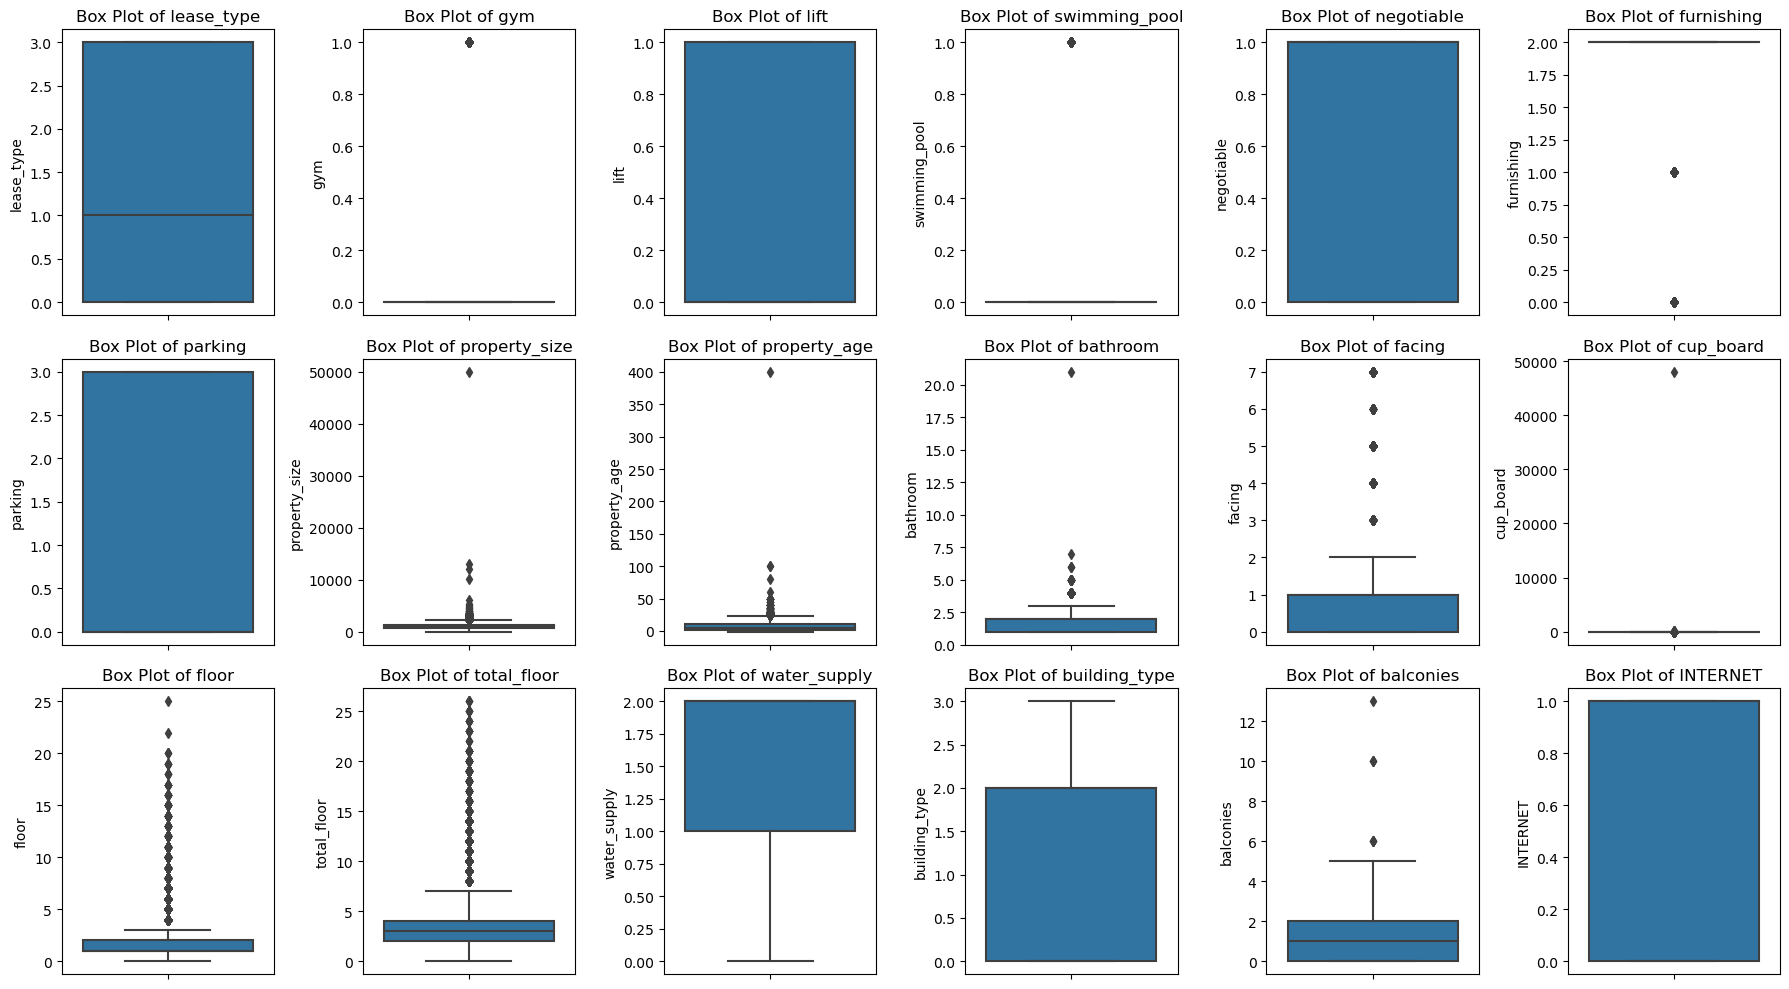

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Columns to visualize
columns_to_visualize = ['lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing',
                         'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
                         'floor', 'total_floor', 'water_supply', 'building_type', 'balconies', 'INTERNET']

# Create box plots for specified columns
plt.figure(figsize=(18, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


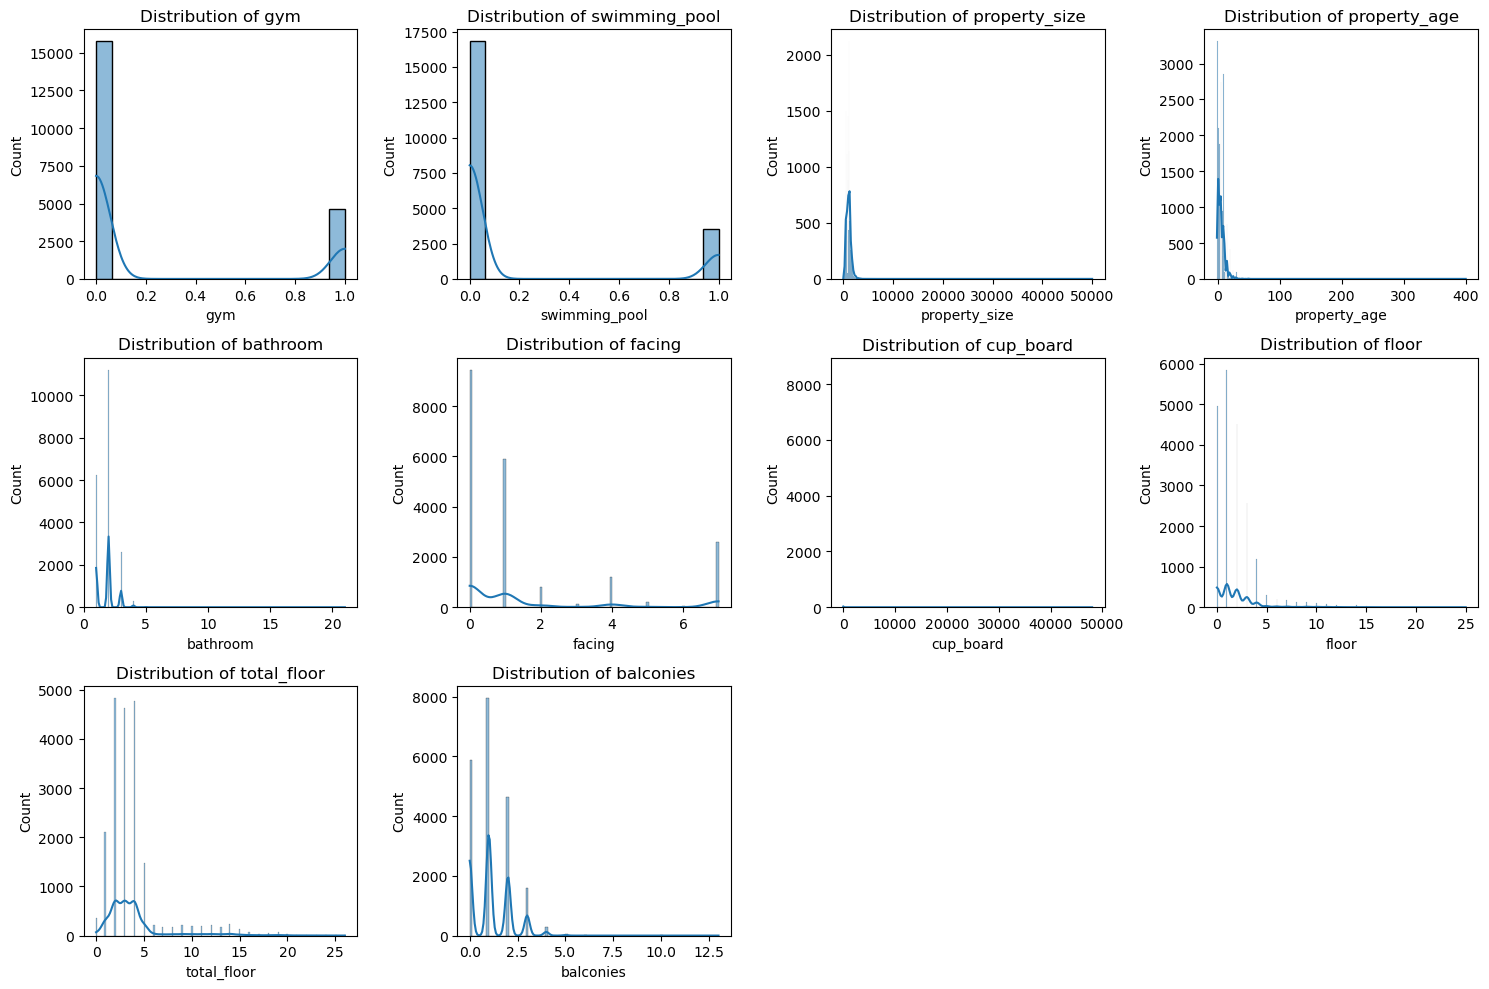

In [18]:
# Assuming df is your DataFrame
columns_with_outliers = ['gym', 'swimming_pool', 'property_size', 'property_age', 'bathroom',
                          'facing', 'cup_board', 'floor', 'total_floor', 'balconies']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


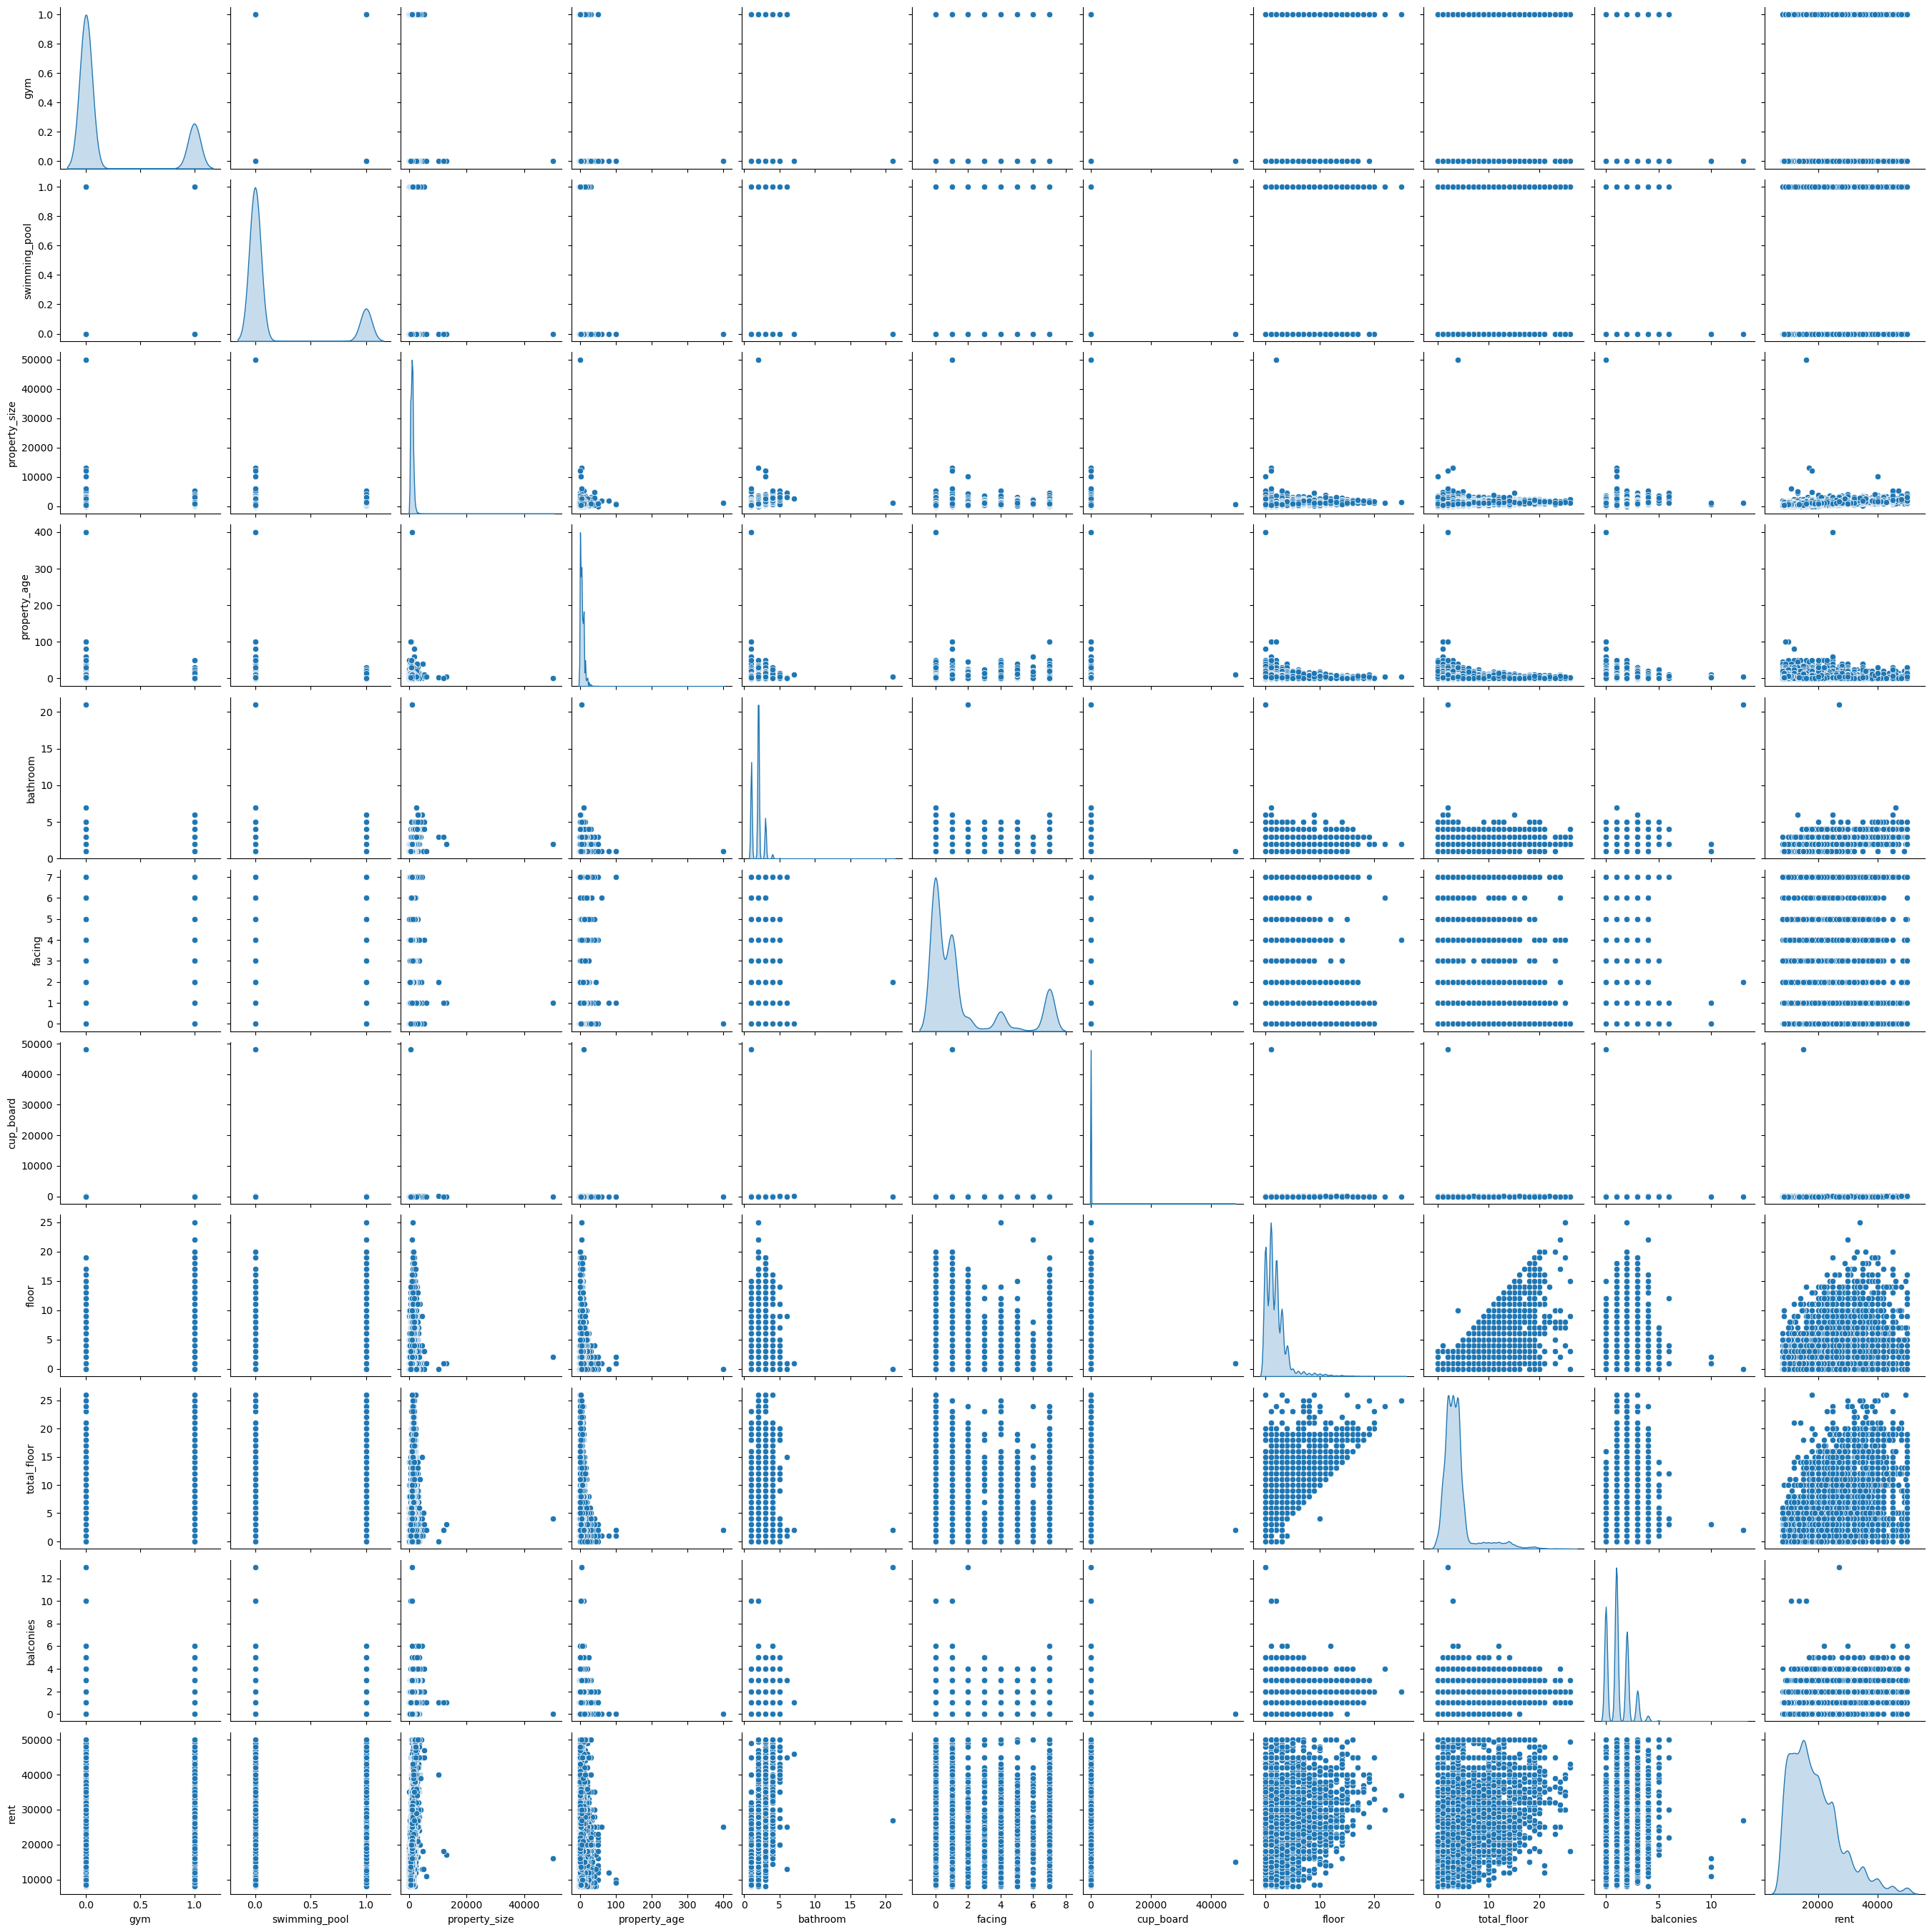

In [19]:
# Assuming df is your DataFrame
sns.pairplot(df, vars=columns_with_outliers + ['rent'], diag_kind='kde')
plt.show()


In [20]:
# Assuming df is your DataFrame
columns_to_cap = ['gym', 'swimming_pool', 'property_size', 'property_age', 'bathroom', 'floor', 'total_floor', 'balconies']

for column in columns_to_cap:
    upper_threshold = df[column].quantile(0.95)
    df[column] = np.where(df[column] > upper_threshold, upper_threshold, df[column])


In [21]:
df

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,year,month,day,time in mints,INTERNET,locality_Banashankari,locality_Bellandur,locality_HSR Layout,locality_JP Nagar,locality_Koramangala,locality_Mahadevapura,locality_Marathahalli,locality_Others,locality_RR Nagar,locality_Whitefield
0,2,12.929557,77.672280,0,0.0,1,0.0,1,2,0,1400.0,4.0,2.0,2,2.0,3.0,4.0,1,0,2.0,22000.0,2017,9,10,768,0,0,1,0,0,0,0,0,0,0,0
1,3,12.982870,80.262012,3,0.0,1,0.0,0,2,0,1350.0,6.0,3.0,0,3.0,1.0,5.0,2,0,3.0,28000.0,2018,12,6,1322,0,0,0,0,0,0,0,0,1,0,0
2,1,12.955991,77.531634,3,0.0,0,0.0,1,2,3,600.0,3.0,1.0,0,1.0,1.0,2.0,1,3,0.0,8000.0,2018,7,20,982,0,0,0,0,0,0,0,0,1,0,0
3,3,12.963903,77.649446,3,0.0,0,0.0,1,2,0,1500.0,15.0,3.0,0,4.0,0.0,0.0,1,3,1.0,45000.0,2018,5,31,1061,0,0,0,0,0,0,0,0,1,0,0
4,1,12.986196,77.718314,3,1.0,1,1.0,1,2,0,1080.0,0.0,2.0,0,1.0,3.0,5.0,2,0,2.0,18000.0,2017,10,24,1109,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20372,1,12.979762,77.615395,0,0.0,1,0.0,1,2,3,850.0,15.0,2.0,0,1.0,1.0,4.0,2,0,1.0,20000.0,2017,11,10,1028,1,0,0,0,0,0,0,0,1,0,0
20373,2,12.931072,77.632361,0,0.0,0,0.0,1,2,0,1000.0,10.0,2.0,1,2.0,1.0,2.0,1,3,2.0,30000.0,2017,10,19,1231,1,0,0,0,0,0,0,0,1,0,0
20374,2,12.901800,77.566597,3,1.0,1,0.0,1,2,0,1000.0,0.0,2.0,7,2.0,5.0,5.0,0,0,2.0,16000.0,2017,12,21,1278,1,0,0,0,0,0,0,0,1,0,0
20375,2,12.965502,77.647694,3,0.0,1,0.0,0,2,0,1000.0,5.0,2.0,0,2.0,2.0,4.0,2,0,3.0,30000.0,2018,6,28,1318,1,0,0,0,0,0,0,0,1,0,0


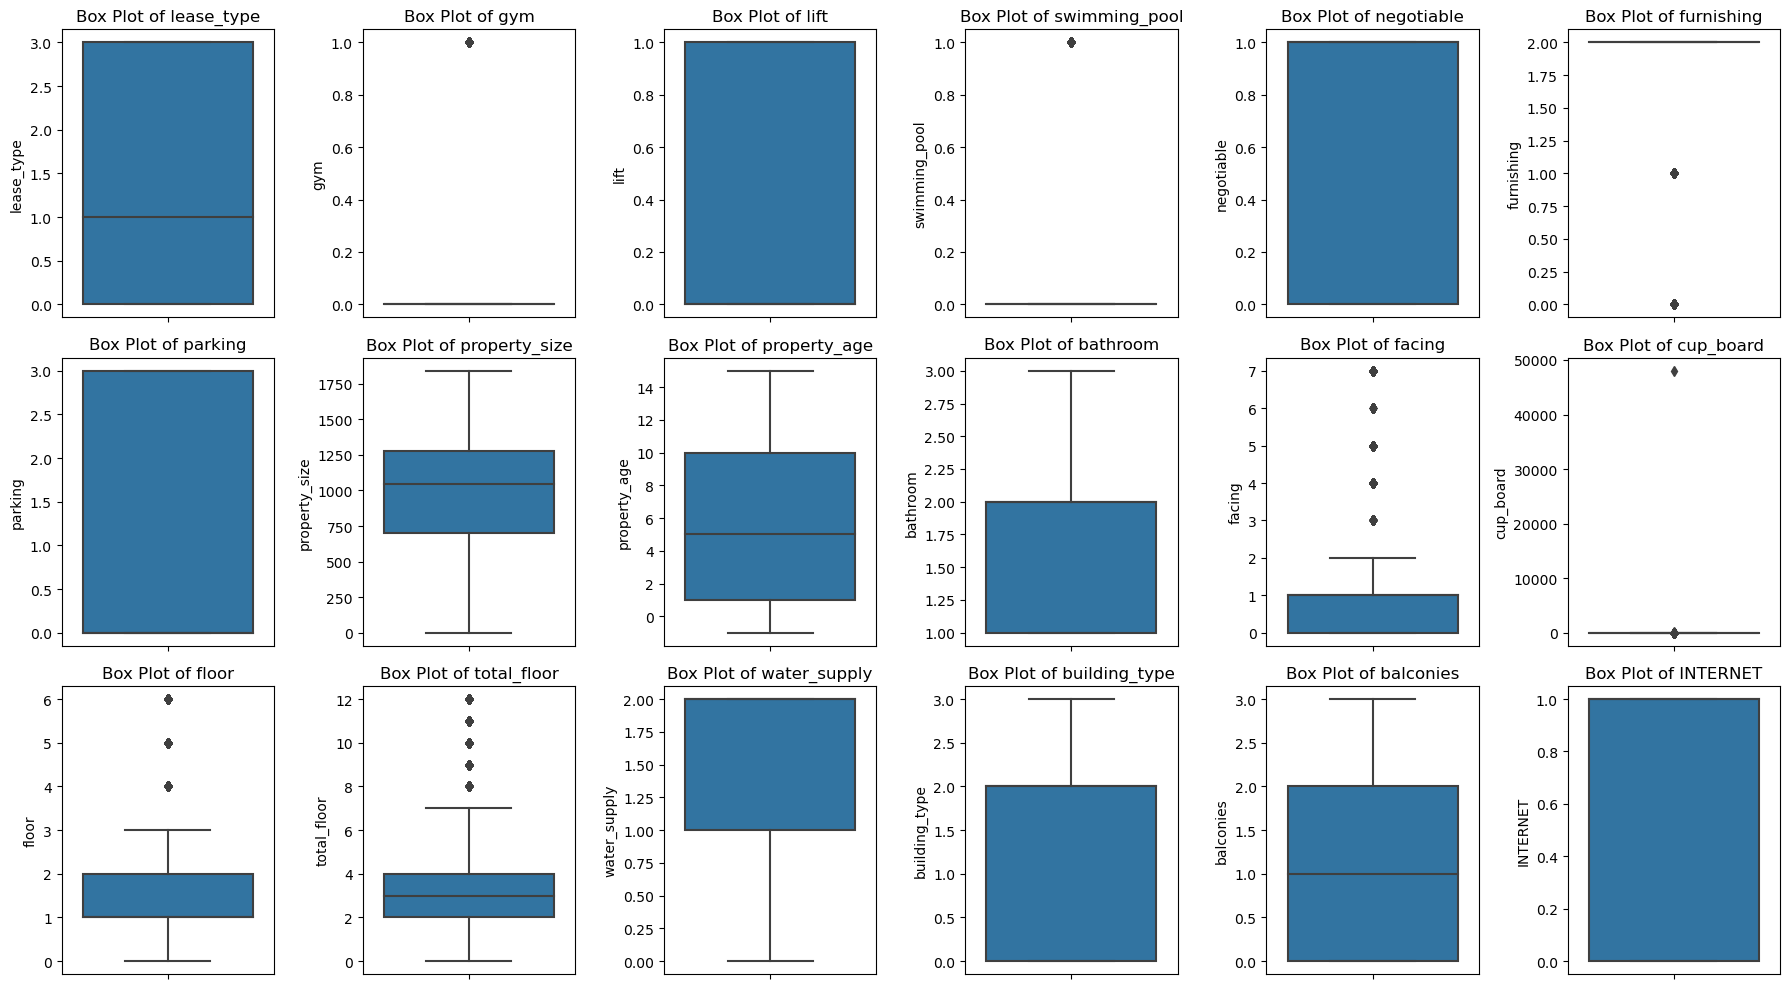

In [22]:
columns_to_visualize = ['lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing',
                         'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
                         'floor', 'total_floor', 'water_supply', 'building_type', 'balconies', 'INTERNET']

# Create box plots for specified columns
plt.figure(figsize=(18, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [23]:
columns_to_cap = ['gym', 'swimming_pool', 'floor','facing', 'total_floor']

for column in columns_to_cap:
    upper_threshold = df[column].quantile(0.95)
    df[column] = np.where(df[column] > upper_threshold, upper_threshold, df[column])


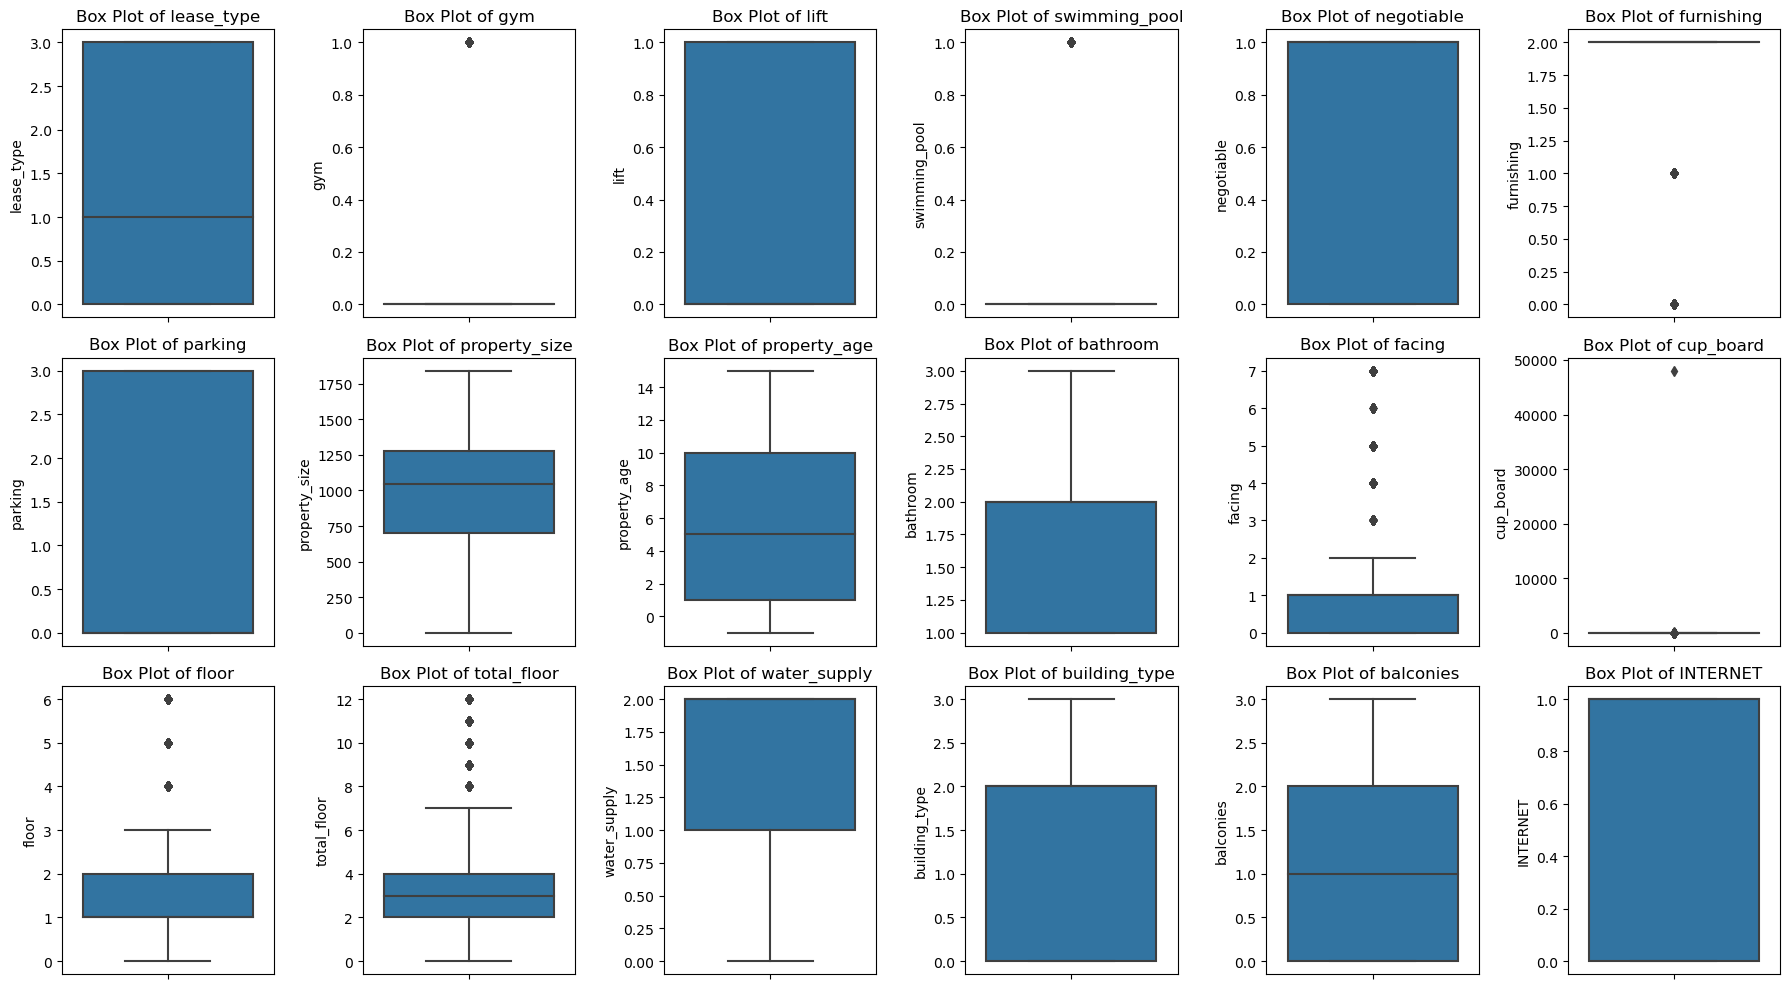

In [24]:
columns_to_visualize = ['lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing',
                         'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
                         'floor', 'total_floor', 'water_supply', 'building_type', 'balconies', 'INTERNET']

# Create box plots for specified columns
plt.figure(figsize=(18, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

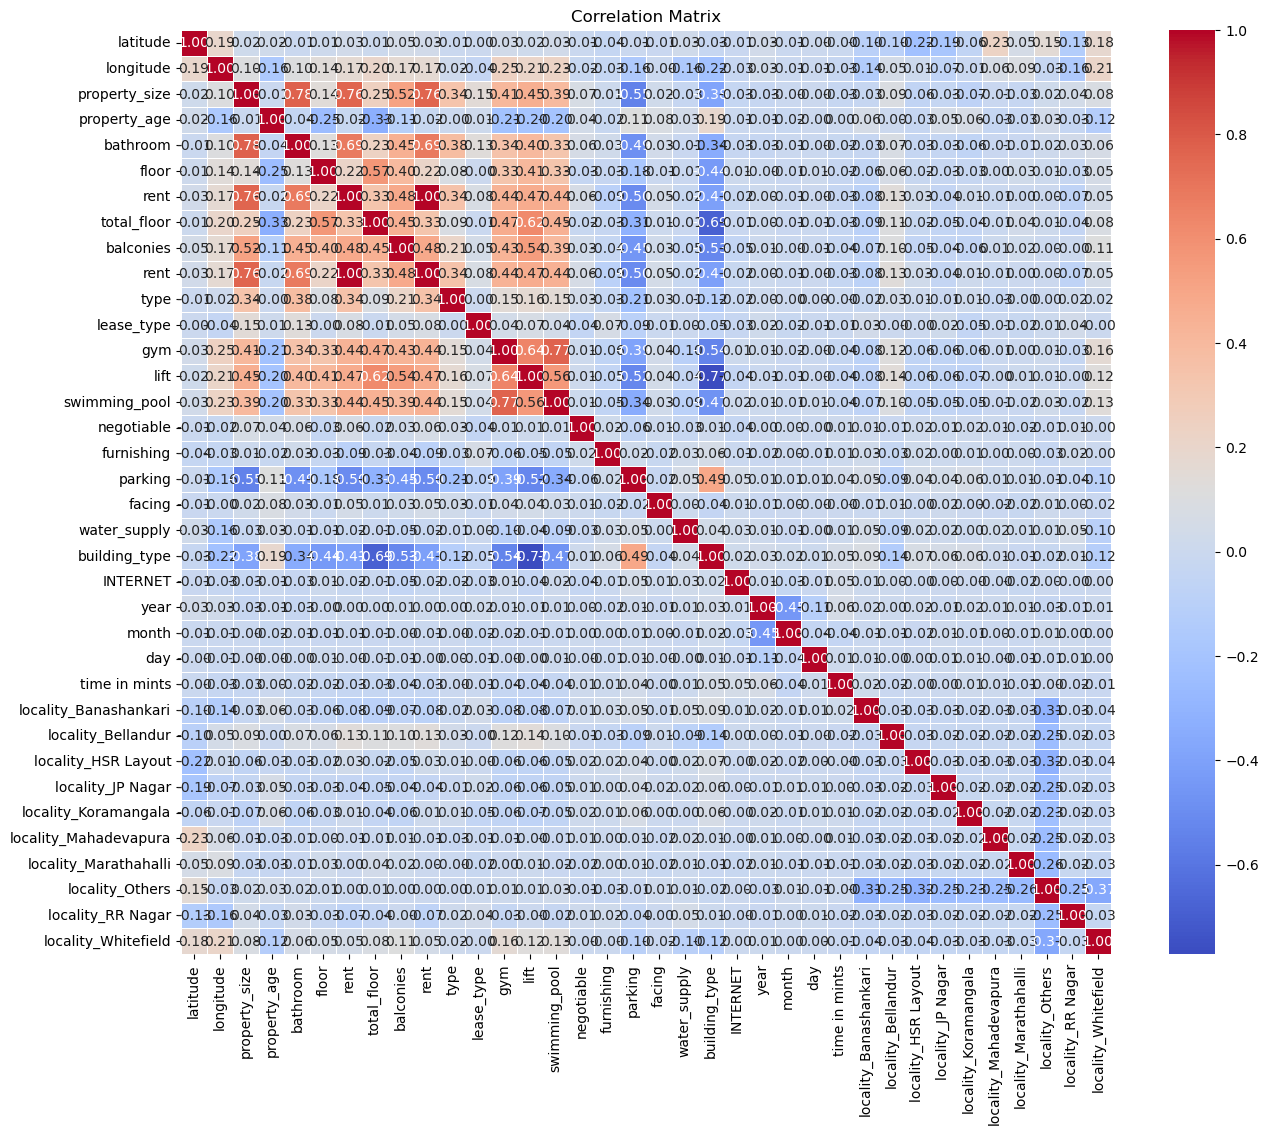

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select relevant columns for correlation analysis
numerical_columns = ['latitude', 'longitude', 'property_size', 'property_age', 'bathroom', 'floor', 'rent','total_floor', 'balconies', 'rent']
categorical_columns = ['type', 'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing', 'parking', 'facing', 'water_supply', 'building_type', 'INTERNET']
time_related_columns = ['year', 'month', 'day', 'time in mints']
locality_columns = ['locality_Banashankari', 'locality_Bellandur', 'locality_HSR Layout', 'locality_JP Nagar', 'locality_Koramangala', 'locality_Mahadevapura', 'locality_Marathahalli', 'locality_Others', 'locality_RR Nagar', 'locality_Whitefield']

# Combine selected columns
selected_columns = numerical_columns + categorical_columns + time_related_columns + locality_columns

# Create a correlation matrix
correlation_matrix = df[selected_columns].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [29]:
# Assuming df is your DataFrame
columns_to_log_transform = ['facing', 'total_floor', 'floor']

for column in columns_to_log_transform:
    df[column] = np.log1p(df[column])


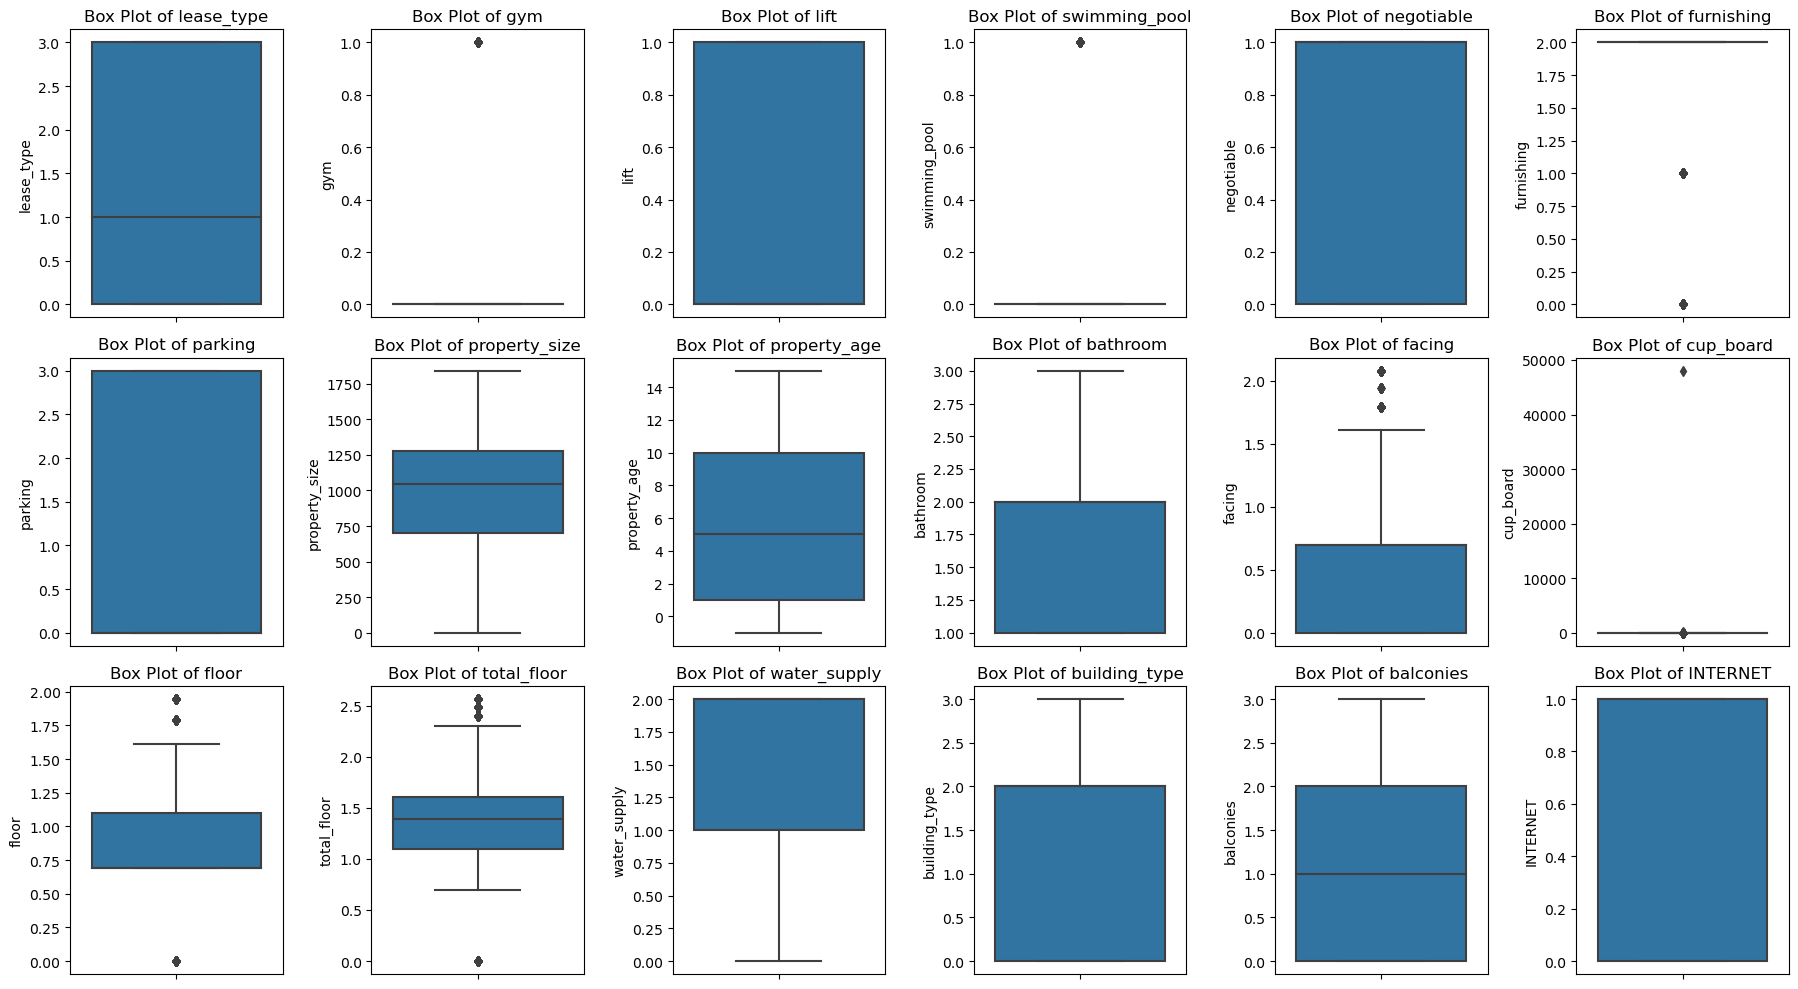

In [30]:
columns_to_visualize = ['lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing',
                         'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
                         'floor', 'total_floor', 'water_supply', 'building_type', 'balconies', 'INTERNET']

# Create box plots for specified columns
plt.figure(figsize=(18, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [40]:
Q1 = df['furnishing'].quantile(0.25)
Q3 = df['furnishing'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [41]:
threshold = lower_bound  # You can choose a different threshold
df['furnishing'] = np.where(df['furnishing'] > upper_bound, threshold, df['furnishing'])


In [ ]:
Q1 = df['total_floor'].quantile(0.25)
Q3 = df['total_floor'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [43]:
threshold = upper_bound  # You can choose a different threshold
df['total_floor'] = np.where(df['total_floor'] > upper_bound, threshold, df['total_floor'])


In [45]:
Q1 = df['facing'].quantile(0.25)
Q3 = df['facing'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [46]:
threshold = upper_bound  # You can choose a different threshold
df['facing'] = np.where(df['facing'] > upper_bound, threshold, df['facing'])


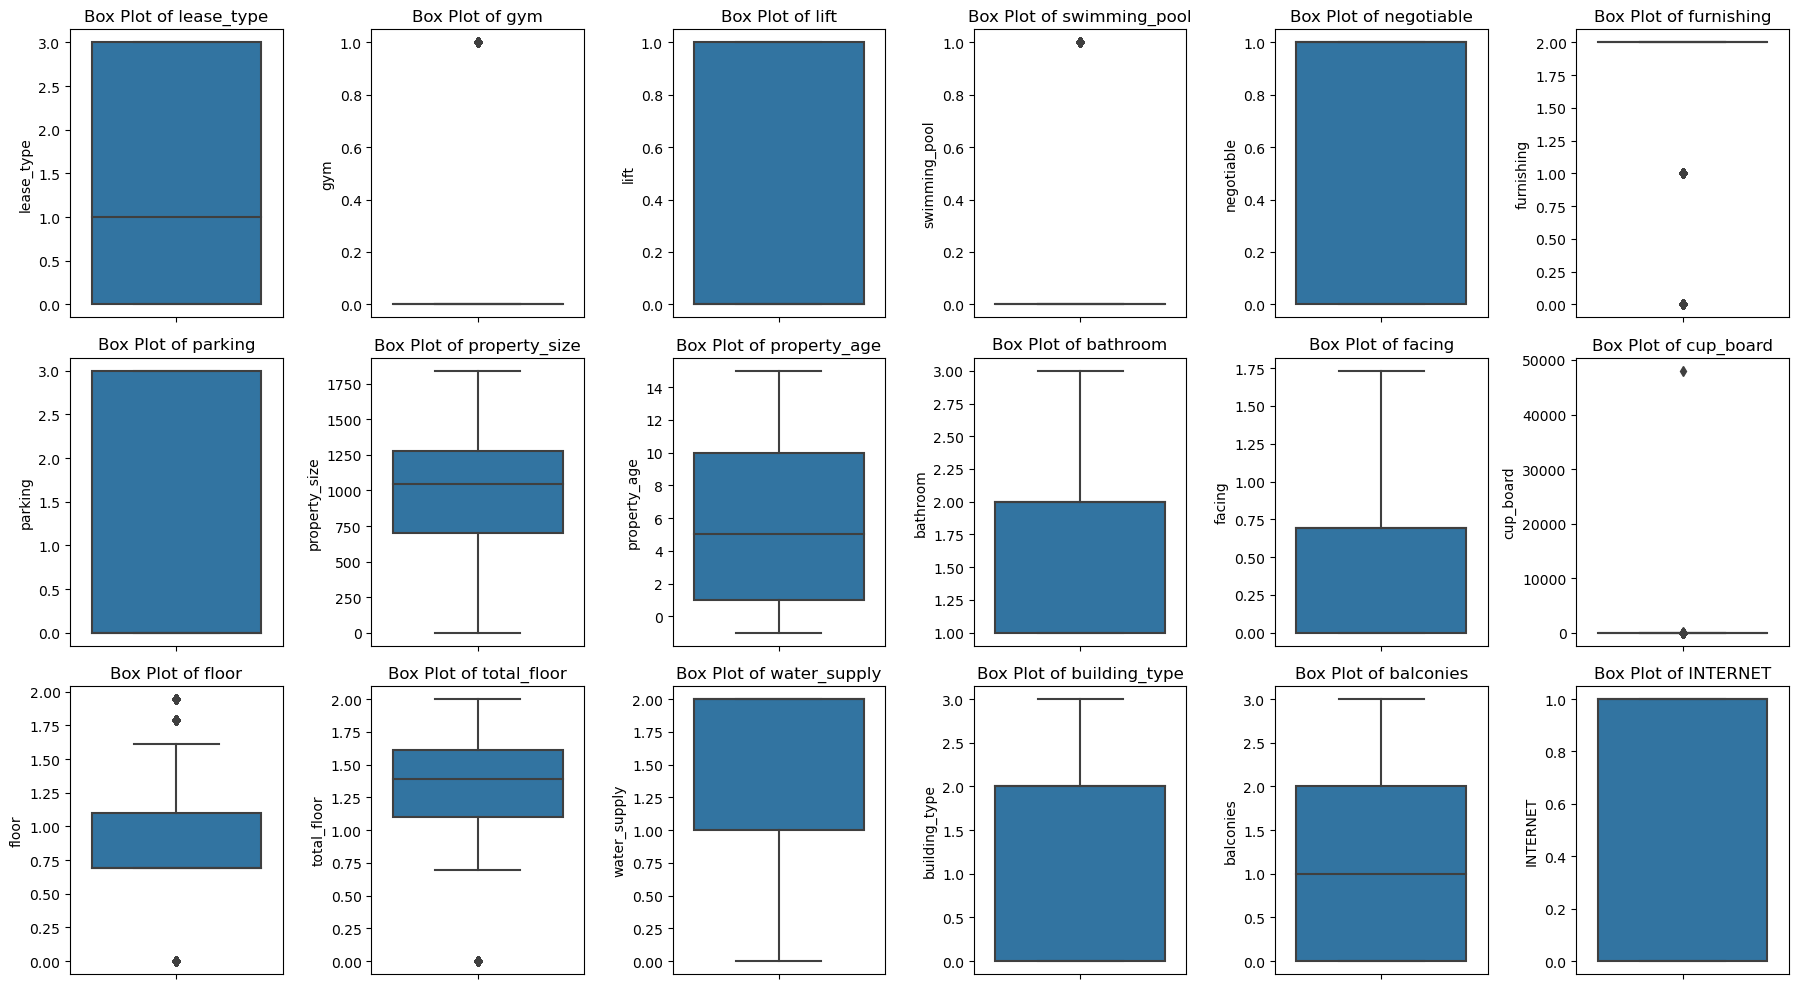

In [53]:
columns_to_visualize = ['lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing',
                         'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
                         'floor', 'total_floor', 'water_supply', 'building_type', 'balconies', 'INTERNET']

# Create box plots for specified columns
plt.figure(figsize=(18, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

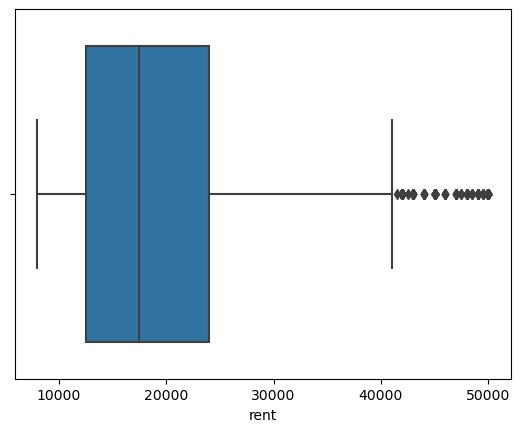

In [54]:
sns.boxplot(x=df['rent'])
plt.show()

In [55]:
Q1 = df['rent'].quantile(0.25)
Q3 = df['rent'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [56]:
threshold = upper_bound  # You can choose a different threshold
df['rent'] = np.where(df['rent'] > upper_bound, threshold, df['rent'])

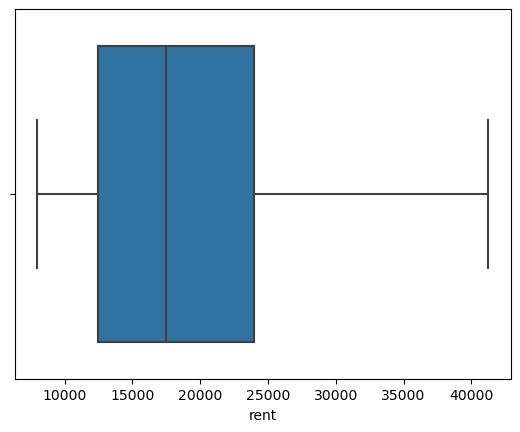

In [59]:
sns.boxplot(x=df['rent'])
plt.show()

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is your DataFrame with features and target variable
# X should contain the selected features, and y should contain the target variable ('rent')

# Select features and target variable
features = ['lease_type',  'lift',  'negotiable', 'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'floor', 'total_floor', 'water_supply', 'building_type', 'balconies', 'year', 'month', 'day', 'time in mints', 'INTERNET']
target = 'rent'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print predicted rent values along with actual rent values
result_df = pd.DataFrame({'Actual Rent': y_test, 'Predicted Rent': y_pred})
print(result_df)


r2 = r2_score(y_test, y_pred)


print(f'R-squared Score: {r2}')


       Actual Rent  Predicted Rent
14685      35000.0    18134.901591
2145       30000.0    32060.541538
408         8000.0    16752.557113
4772       20000.0    17360.626775
1350       41250.0    32195.874354
...            ...             ...
10294      15000.0    12283.212524
17722      20000.0    12469.630681
13631      19000.0    21868.864998
8129       15000.0    16497.510452
13305      23500.0    22958.441183

[4076 rows x 2 columns]
R-squared Score: 0.6255690605569084


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib

# Assuming df is your DataFrame with features and target variable
# X should contain the selected features, and y should contain the target variable ('rent')

# Select features and target variable
features = ['lease_type',  'lift',  'negotiable', 'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board', 'floor', 'total_floor', 'water_supply', 'building_type', 'balconies', 'year', 'month', 'day', 'time in mints', 'INTERNET']
target = 'rent'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print predicted rent values along with actual rent values
result_df = pd.DataFrame({'Actual Rent': y_test, 'Predicted Rent': y_pred})
print(result_df)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

# Save the trained model to a pickle file
joblib.dump(model, 'random_forest_model.pkl')


       Actual Rent  Predicted Rent
14685      35000.0         23914.5
2145       30000.0         27877.5
408         8000.0         15339.0
4772       20000.0         18001.0
1350       41250.0         36347.5
...            ...             ...
10294      15000.0         13731.0
17722      20000.0         12336.0
13631      19000.0         19595.0
8129       15000.0         16348.0
13305      23500.0         22153.0

[4076 rows x 2 columns]
R-squared Score: 0.6545231225606922


['random_forest_model.pkl']